In [1]:
import os
import numpy as np
from astropy.constants import iau2015 as const
from astropy import units
from matplotlib import pyplot as plt
from matplotlib import gridspec
from fitting import MgtoLg,get_phi_pd17
import fitting

2024-12-02 17:30:27.388683: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.4.131). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


In [2]:
L_0 = const.L_bol0.to(units.erg / units.s).value   # erg/s
L_sun = const.L_sun.to(units.erg / units.s).value  # erg/s

In [3]:
def abs_mag_to_L(M):
    """
    Converts absolute magnitude to luminosity.
    
    Args:
        M : absolute magnitude
        L : luminosity in erg/s
    """
    L = L_0 * 10.0 ** (-0.4 * M)
    return L


# https://ui.adsabs.harvard.edu/abs/2020MNRAS.495.3252S/abstract
def get_lfpars_shen20(z):
    """
    Returns the (gamma1, gamma2, L_star, phi_star) parameters
        of the Shen+20 paper for a given redshift.
    
    Args:
        z: redshift

    Returns:
        gamma1: gamma1 parameter
        gamma2: gamma2 parameter
        L_star: L_star parameter (in erg/s)
        phi_star: phi_star parameter

    Notes:
        Values from best-fit A, Table 4.
    """

    params_A = {
        "a0": 0.8569,
        "a1": -0.2614,
        "a2": 0.0200,
        "b0": 2.5375,
        "b1": -1.0425,
        "b2": 1.1201,
        "c0": 13.0088,
        "c1": -0.5759,
        "c2": 0.4554,
        "d0": -3.5426,
        "d1": -0.3936,
    }
    z_ref = 2  # see after Eq. 14
    
    # gamma1
    a0, a1, a2 = params_A["a0"], params_A["a1"], params_A["a2"]
    gamma1 = a0 * T0(1 + z) + a1 * T1(1 + z) + a2 * T2(1 + z)
    # gamma2
    b0, b1, b2 = params_A["b0"], params_A["b1"], params_A["b2"]
    gamma2 = 2 * b0 / (((1 + z) / (1 + z_ref)) ** b1 + ((1 + z) / (1 + z_ref)) ** b2)
    # L_star (Eq. 14 gives L_star in L_sun units)
    c0, c1, c2 = params_A["c0"], params_A["c1"], params_A["c2"]
    L_star = 10.0 ** (
        2 * c0 / (((1 + z) / (1 + z_ref)) ** c1 + ((1 + z) / (1 + z_ref)) ** c2)
    )
    L_star *= L_sun
    # phi_star
    d0, d1 = params_A["d0"], params_A["d1"]
    phi_star = 10.0 ** (d0 * T0(1 + z) + d1 * T1(1 + z))

    return gamma1, gamma2, L_star, phi_star
    # Chebyshev polynomials
def T0(x):
    return 1

def T1(x):
    return x

def T2(x):
    return 2 * x ** 2 - 1


def get_lfpars(paper, z):

    assert paper in ["shen20"]

    if paper == "shen20":

        gamma1, gamma2, L_star, phi_star = get_lfpars_shen20(z)

    return gamma1, gamma2, L_star, phi_star


def get_phis(Ls, z, paper):
    gamma1, gamma2, L_star, phi_star = get_lfpars(paper, z)
    phis = phi_star / ((Ls / L_star) ** gamma1 + (Ls / L_star) ** gamma2)
    return phis

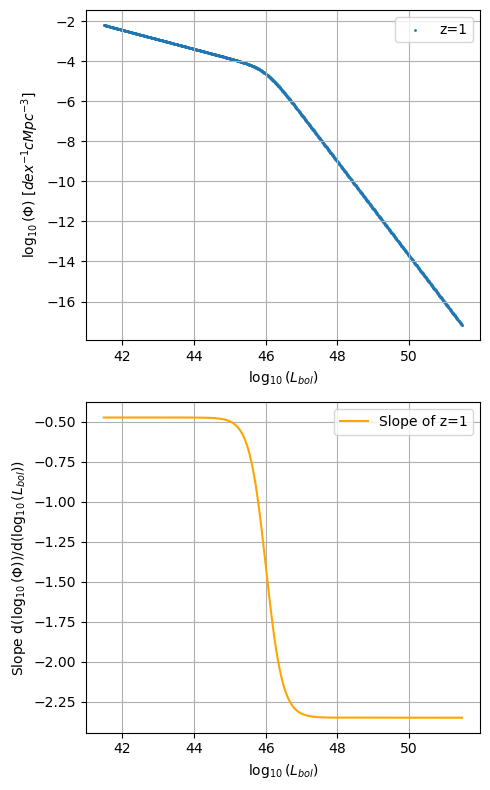

In [4]:
# Assuming Ls and phis are defined as per your previous messages
z = 1
Ms = np.linspace(-40, -15, 1000)
Ls = abs_mag_to_L(Ms)
phis = get_phis(Ls, z, "shen20")

# Convert Ls and phis to logarithmic scale
logLs = np.log10(Ls)
logPhis = np.log10(phis)

# Calculate the numerical derivative of logPhis with respect to logLs
# This represents the slope at each point (d(logPhi)/d(logL))
slopes = np.diff(logPhis) / np.diff(logLs)

# To plot the slope, we need x-values that correspond to the points between the original x-values
# Use the midpoint of each interval in logLs for the x-values of the slope
logLs_midpoints = (logLs[:-1] + logLs[1:]) / 2

# Now, plot the original data and the slope in separate subplots for comparison
fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Plot the original data
axs[0].scatter(logLs, logPhis, s=1, label='z=1')
axs[0].set_xlabel('$\log_{10}(L_{bol})$')
axs[0].set_ylabel('$\log_{10}(\Phi)\ [dex^{-1}cMpc^{-3}]$')
axs[0].grid()
axs[0].legend()

# Plot the slope
axs[1].plot(logLs_midpoints, slopes, label='Slope of z=1', color='orange')
axs[1].set_xlabel('$\log_{10}(L_{bol})$')
axs[1].set_ylabel('Slope d($\log_{10}(\Phi)$)/d($\log_{10}(L_{bol})$)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

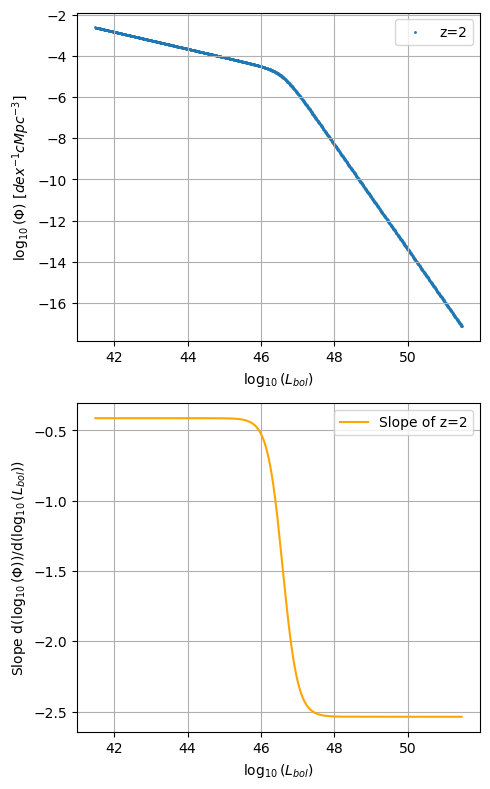

In [5]:
# Assuming Ls and phis are defined as per your previous messages
z = 2
Ms = np.linspace(-40, -15, 1000)
Ls = abs_mag_to_L(Ms)
phis = get_phis(Ls, z, "shen20")

# Convert Ls and phis to logarithmic scale
logLs = np.log10(Ls)
logPhis = np.log10(phis)

# Calculate the numerical derivative of logPhis with respect to logLs
# This represents the slope at each point (d(logPhi)/d(logL))
slopes = np.diff(logPhis) / np.diff(logLs)

# To plot the slope, we need x-values that correspond to the points between the original x-values
# Use the midpoint of each interval in logLs for the x-values of the slope
logLs_midpoints = (logLs[:-1] + logLs[1:]) / 2

# Now, plot the original data and the slope in separate subplots for comparison
fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Plot the original data
axs[0].scatter(logLs, logPhis, s=1, label='z=2')
axs[0].set_xlabel('$\log_{10}(L_{bol})$')
axs[0].set_ylabel('$\log_{10}(\Phi)\ [dex^{-1}cMpc^{-3}]$')
axs[0].grid()
axs[0].legend()

# Plot the slope
axs[1].plot(logLs_midpoints, slopes, label='Slope of z=2', color='orange')
axs[1].set_xlabel('$\log_{10}(L_{bol})$')
axs[1].set_ylabel('Slope d($\log_{10}(\Phi)$)/d($\log_{10}(L_{bol})$)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

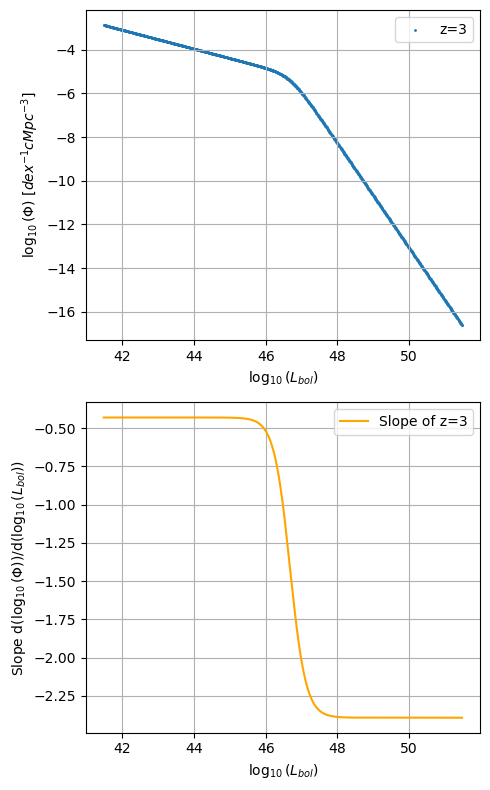

In [6]:
# Assuming Ls and phis are defined as per your previous messages
z = 3
Ms = np.linspace(-40, -15, 1000)
Ls = abs_mag_to_L(Ms)
phis = get_phis(Ls, z, "shen20")

# Convert Ls and phis to logarithmic scale
logLs = np.log10(Ls)
logPhis = np.log10(phis)

# Calculate the numerical derivative of logPhis with respect to logLs
# This represents the slope at each point (d(logPhi)/d(logL))
slopes = np.diff(logPhis) / np.diff(logLs)

# To plot the slope, we need x-values that correspond to the points between the original x-values
# Use the midpoint of each interval in logLs for the x-values of the slope
logLs_midpoints = (logLs[:-1] + logLs[1:]) / 2

# Now, plot the original data and the slope in separate subplots for comparison
fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Plot the original data
axs[0].scatter(logLs, logPhis, s=1, label='z=3')
axs[0].set_xlabel('$\log_{10}(L_{bol})$')
axs[0].set_ylabel('$\log_{10}(\Phi)\ [dex^{-1}cMpc^{-3}]$')
axs[0].grid()
axs[0].legend()

# Plot the slope
axs[1].plot(logLs_midpoints, slopes, label='Slope of z=3', color='orange')
axs[1].set_xlabel('$\log_{10}(L_{bol})$')
axs[1].set_ylabel('Slope d($\log_{10}(\Phi)$)/d($\log_{10}(L_{bol})$)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

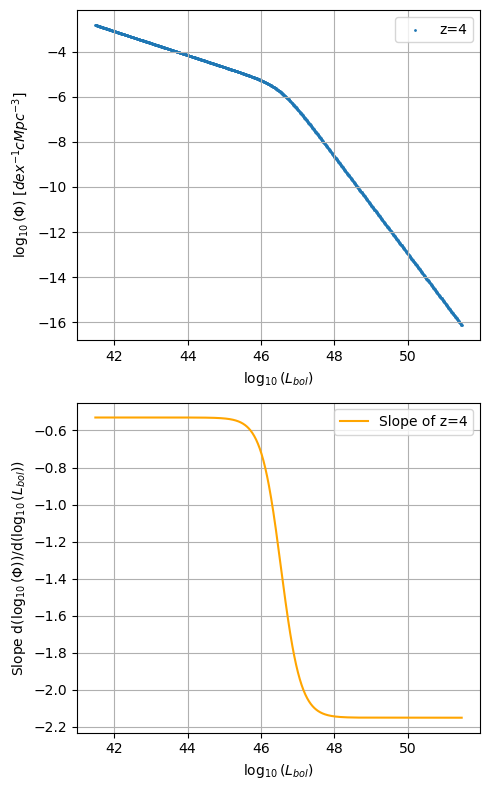

In [7]:
# Assuming Ls and phis are defined as per your previous messages
z = 4
Ms = np.linspace(-40, -15, 1000)
Ls = abs_mag_to_L(Ms)
phis = get_phis(Ls, z, "shen20")

# Convert Ls and phis to logarithmic scale
logLs = np.log10(Ls)
logPhis = np.log10(phis)

# Calculate the numerical derivative of logPhis with respect to logLs
# This represents the slope at each point (d(logPhi)/d(logL))
slopes = np.diff(logPhis) / np.diff(logLs)

# To plot the slope, we need x-values that correspond to the points between the original x-values
# Use the midpoint of each interval in logLs for the x-values of the slope
logLs_midpoints = (logLs[:-1] + logLs[1:]) / 2

# Now, plot the original data and the slope in separate subplots for comparison
fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Plot the original data
axs[0].scatter(logLs, logPhis, s=1, label='z=4')
axs[0].set_xlabel('$\log_{10}(L_{bol})$')
axs[0].set_ylabel('$\log_{10}(\Phi)\ [dex^{-1}cMpc^{-3}]$')
axs[0].grid()
axs[0].legend()

# Plot the slope
axs[1].plot(logLs_midpoints, slopes, label='Slope of z=4', color='orange')
axs[1].set_xlabel('$\log_{10}(L_{bol})$')
axs[1].set_ylabel('Slope d($\log_{10}(\Phi)$)/d($\log_{10}(L_{bol})$)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

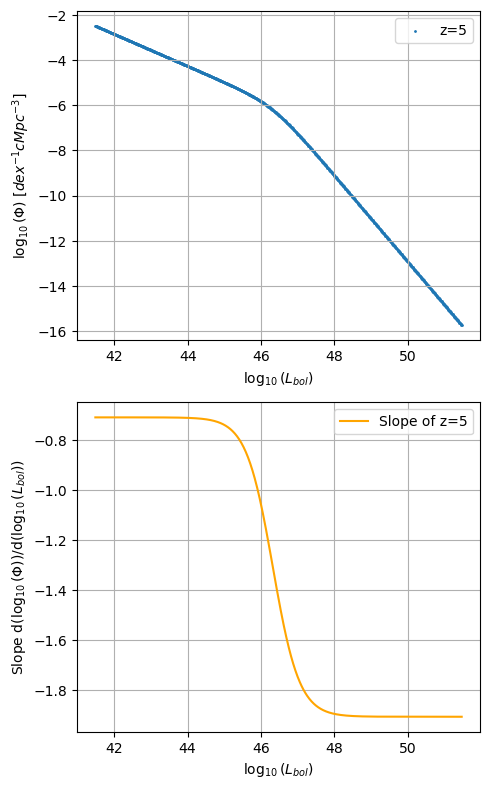

In [8]:
# Assuming Ls and phis are defined as per your previous messages
z = 5
Ms = np.linspace(-40, -15, 1000)
Ls = abs_mag_to_L(Ms)
phis = get_phis(Ls, z, "shen20")

# Convert Ls and phis to logarithmic scale
logLs = np.log10(Ls)
logPhis = np.log10(phis)

# Calculate the numerical derivative of logPhis with respect to logLs
# This represents the slope at each point (d(logPhi)/d(logL))
slopes = np.diff(logPhis) / np.diff(logLs)

# To plot the slope, we need x-values that correspond to the points between the original x-values
# Use the midpoint of each interval in logLs for the x-values of the slope
logLs_midpoints = (logLs[:-1] + logLs[1:]) / 2

# Now, plot the original data and the slope in separate subplots for comparison
fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Plot the original data
axs[0].scatter(logLs, logPhis, s=1, label='z=5')
axs[0].set_xlabel('$\log_{10}(L_{bol})$')
axs[0].set_ylabel('$\log_{10}(\Phi)\ [dex^{-1}cMpc^{-3}]$')
axs[0].grid()
axs[0].legend()

# Plot the slope
axs[1].plot(logLs_midpoints, slopes, label='Slope of z=5', color='orange')
axs[1].set_xlabel('$\log_{10}(L_{bol})$')
axs[1].set_ylabel('Slope d($\log_{10}(\Phi)$)/d($\log_{10}(L_{bol})$)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

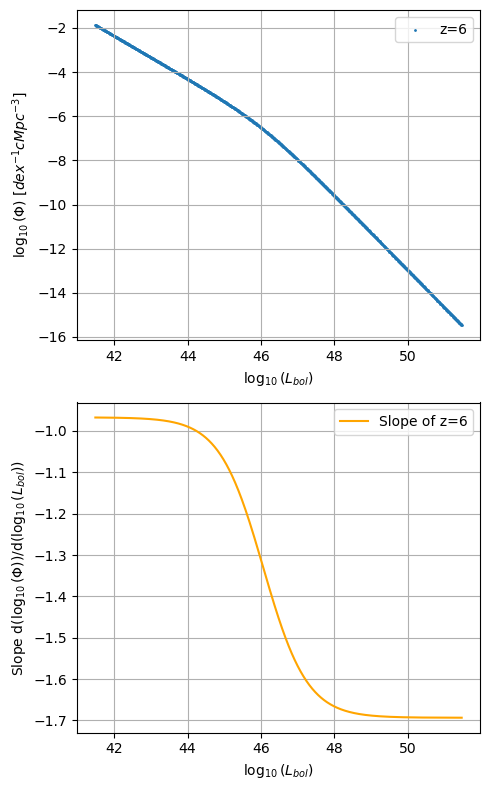

In [9]:
# Assuming Ls and phis are defined as per your previous messages
z = 6
Ms = np.linspace(-40, -15, 1000)
Ls = abs_mag_to_L(Ms)
phis = get_phis(Ls, z, "shen20")

# Convert Ls and phis to logarithmic scale
logLs = np.log10(Ls)
logPhis = np.log10(phis)

# Calculate the numerical derivative of logPhis with respect to logLs
# This represents the slope at each point (d(logPhi)/d(logL))
slopes = np.diff(logPhis) / np.diff(logLs)

# To plot the slope, we need x-values that correspond to the points between the original x-values
# Use the midpoint of each interval in logLs for the x-values of the slope
logLs_midpoints = (logLs[:-1] + logLs[1:]) / 2

# Now, plot the original data and the slope in separate subplots for comparison
fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Plot the original data
axs[0].scatter(logLs, logPhis, s=1, label='z=6')
axs[0].set_xlabel('$\log_{10}(L_{bol})$')
axs[0].set_ylabel('$\log_{10}(\Phi)\ [dex^{-1}cMpc^{-3}]$')
axs[0].grid()
axs[0].legend()

# Plot the slope
axs[1].plot(logLs_midpoints, slopes, label='Slope of z=6', color='orange')
axs[1].set_xlabel('$\log_{10}(L_{bol})$')
axs[1].set_ylabel('Slope d($\log_{10}(\Phi)$)/d($\log_{10}(L_{bol})$)')
axs[1].grid()
axs[1].legend()

plt.tight_layout()
plt.show()

[6.87522714e-08 6.97565596e-08 7.07744405e-08 7.18060278e-08
 7.28514848e-08 7.39109680e-08 7.49846620e-08 7.60727019e-08
 7.71752511e-08 7.82924658e-08 7.94245310e-08 8.05715885e-08
 8.17337948e-08 8.29113489e-08 8.41043786e-08 8.53130899e-08
 8.65376180e-08 8.77781687e-08 8.90348630e-08 9.03079282e-08
 9.15974994e-08 9.29037256e-08 9.42268557e-08 9.55669890e-08
 9.69243388e-08 9.82990755e-08 9.96913982e-08 1.01101421e-07
 1.02529384e-07 1.03975438e-07 1.05439781e-07 1.06922542e-07
 1.08423983e-07 1.09944224e-07 1.11483466e-07 1.13041885e-07
 1.14619660e-07 1.16216974e-07 1.17834070e-07 1.19470982e-07
 1.21128082e-07 1.22805432e-07 1.24503259e-07 1.26221735e-07
 1.27961059e-07 1.29721371e-07 1.31502915e-07 1.33305804e-07
 1.35130321e-07 1.36976581e-07 1.38844811e-07 1.40735153e-07
 1.42647821e-07 1.44582998e-07 1.46540856e-07 1.48521607e-07
 1.50525395e-07 1.52552445e-07 1.54602901e-07 1.56677004e-07
 1.58774881e-07 1.60896732e-07 1.63042756e-07 1.65213052e-07
 1.67407933e-07 1.696274

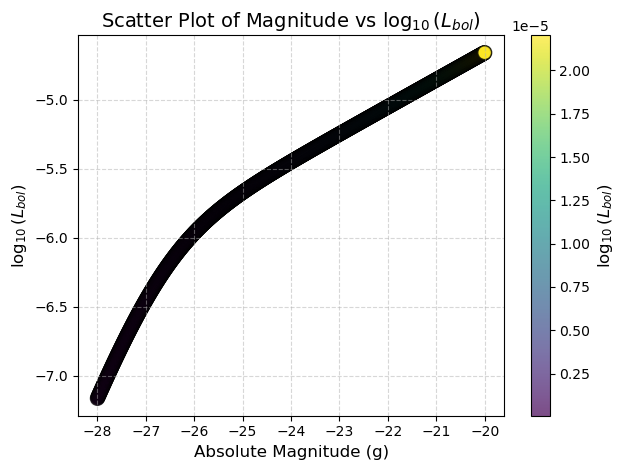

In [10]:
z = 2.5
Mg = np.linspace(-28, -20, 1000)
Lg = fitting.MgtoLg(Mg)
phis = 0.4*fitting.get_phis(Lg, z, "pd17")
print(phis)
scatter = plt.scatter(Mg, np.log10(phis), c=phis, cmap='viridis', edgecolors='black', s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Absolute Magnitude (g)', fontsize=12)
plt.ylabel('$\log_{10}(L_{bol})$', fontsize=12)
plt.title('Scatter Plot of Magnitude vs $\log_{10}(L_{bol})$', fontsize=14)

# Add colorbar for better interpretation of the colors
cbar = plt.colorbar(scatter)
cbar.set_label('$\log_{10}(L_{bol})$', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Ensure the layout is tight and labels are not cut off
plt.show()

[2.54915288e+29 2.52128431e+29 2.49373100e+29 2.46647898e+29
 2.43952485e+29 2.41285462e+29 2.38648644e+29 2.36040651e+29
 2.33461124e+29 2.30908817e+29 2.28385392e+29 2.25888545e+29
 2.23419994e+29 2.20978398e+29 2.18563531e+29 2.16174033e+29
 2.13811659e+29 2.11474145e+29 2.09163132e+29 2.06877336e+29
 2.04616532e+29 2.02379547e+29 2.00167911e+29 1.97980417e+29
 1.95816855e+29 1.93676093e+29 1.91559547e+29 1.89465310e+29
 1.87394779e+29 1.85346896e+29 1.83321398e+29 1.81317226e+29
 1.79335740e+29 1.77375920e+29 1.75437520e+29 1.73519522e+29
 1.71623284e+29 1.69747012e+29 1.67891972e+29 1.66057201e+29
 1.64242490e+29 1.62446914e+29 1.60671663e+29 1.58915792e+29
 1.57179142e+29 1.55460767e+29 1.53761868e+29 1.52080847e+29
 1.50418886e+29 1.48775058e+29 1.47149214e+29 1.45540502e+29
 1.43949999e+29 1.42376261e+29 1.40820345e+29 1.39281420e+29
 1.37759326e+29 1.36253269e+29 1.34764278e+29 1.33291533e+29
 1.31834900e+29 1.30393615e+29 1.28968641e+29 1.27558684e+29
 1.26164689e+29 1.247859

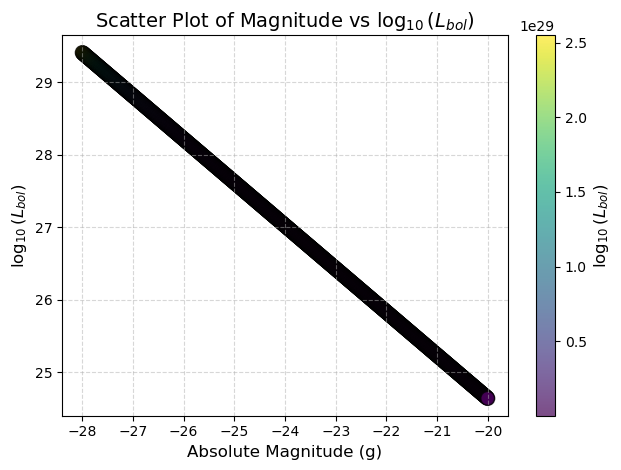

In [11]:
z = 2.5
Mg = np.linspace(-28, -20, 1000)
Lg = MgtoLg(Mg)
phis = get_phi_pd17(Mg, z)
print(phis)
# Now, plot the original data and the slope in separate subplots for comparison
# Scatter plot with customization
scatter = plt.scatter(Mg, np.log10(phis), c=phis, cmap='viridis', edgecolors='black', s=100, alpha=0.7)

# Add labels and title
plt.xlabel('Absolute Magnitude (g)', fontsize=12)
plt.ylabel('$\log_{10}(L_{bol})$', fontsize=12)
plt.title('Scatter Plot of Magnitude vs $\log_{10}(L_{bol})$', fontsize=14)

# Add colorbar for better interpretation of the colors
cbar = plt.colorbar(scatter)
cbar.set_label('$\log_{10}(L_{bol})$', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()  # Ensure the layout is tight and labels are not cut off
plt.show()